# Allysa Webber


### Research question 1: 
#### Are there significant differences in the mean temperature, precipitation, and snowfall values in January from 2011-2023? 
### Research question 2: 
#### How do snowfall, precipitation and temperature values interact with one another? 
### Research question 3: 
#### How do snowfall, precipitation and temperature values interact throughout the year? Are values in the winter predictive of values in the summer?


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

## Import, clean, and save climate data to work with. 

In [45]:
#import and concat the climate files with a loop
#winter data
files= (glob('/Users/allysawebber/Documents/School/data301/project-group33/data/raw/winterdata/*'))
df_list=[]

for i in files:
    #print(i)
    df=pd.read_csv(i)
    df['year']=i[-8:-4]
    #print(df)
    df_list.append(df)
df=pd.concat(df_list)

In [46]:
#summer data
files= (glob('/Users/allysawebber/Documents/School/data301/project-group33/data/raw/summerdata/*'))
df2_list=[]

for i in files:
    #print(i)
    df2=pd.read_csv(i)
    df2['year']=i[-8:-4]
    #print(df2)
    df2_list.append(df2)
df2=pd.concat(df2_list)

In [9]:
#make sure all the years imported
df['year'].unique()
df2['year'].unique()

array(['2018', '2019', '2021', '2020', '2022', '2012', '2013', '2011',
       '2014', '2015', '2017', '2016'], dtype=object)

In [10]:
#take a look at the files
df.describe()

,Long,Lat,Tm,DwTm,D,Tx,DwTx,Tn,DwTn,S,DwS,DwP,S_G,Pd,BS,DwBS,BS%,HDD,CDD
count,6624.000000,6624.000000,6097.000000,6097.000000,1582.000000,6346.000000,6346.000000,6347.000000,6347.000000,2747.000000,2747.000000,5791.000000,3779.000000,5791.000000,9.000000,9.000000,6.000000,6097.000000,6097.0
mean,-107.643054,51.527185,-5.810792,1.963097,0.907901,5.762701,1.805862,-20.796975,1.785253,31.445650,3.037131,2.872561,24.100556,9.634778,49.322222,0.333333,79.166667,692.212810,0.0
std,22.113975,5.476269,8.992165,4.773249,2.118783,6.300098,4.545104,12.836126,4.537172,40.291872,5.996424,5.933104,30.498313,6.760172,12.950944,0.500000,23.455632,286.724159,0.0
min,-140.869000,41.949000,-36.300000,0.000000,-9.000000,-31.800000,0.000000,-53.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.500000,0.000000,39.000000,12.600000,0.0
25%,-123.459000,49.025000,-10.700000,0.000000,-0.400000,3.100000,0.000000,-31.500000,0.000000,3.000000,0.000000,0.000000,0.000000,4.000000,44.900000,0.000000,77.250000,451.200000,0.0
50%,-117.633000,50.099000,-4.700000,0.000000,0.900000,6.500000,0.000000,-21.600000,0.000000,20.800000,0.000000,0.000000,17.000000,9.000000,50.800000,0.000000,79.000000,669.900000,0.0
75%,-91.816000,53.295000,1.300000,1.000000,2.100000,10.100000,1.000000,-9.500000,1.000000,45.300000,3.000000,2.000000,37.000000,14.000000,56.700000,1.000000,87.500000,864.800000,0.0
max,-52.753000,82.500000,9.100000,30.000000,9.300000,30.000000,30.000000,4.900000,30.000000,473.000000,30.000000,30.000000,311.000000,31.000000,63.900000,1.000000,111.000000,1683.800000,0.0


In [47]:
####some cleaning(winter data)
#get rid of all other provinces
df= df[df['Prov_or_Ter'].str.contains('BC')]
#drop unneeded columns, rename columns, reorder rows.  
df =(df.drop(columns=['DwTm','DwP','DwTx','DwBS','DwS','DwTn','Tx','Tn','S_G','Pd','BS','HDD','CDD','P%N','BS%','S%N','D'],axis=1))
#rename columns
df=df.rename(columns={'Tm': 'Temp','S': 'Snow','P':'Precip', 'Stn_Name':'Location', 'Clim_ID':'Climate ID', 'Prov_or_Ter':'Province'})
#reorder rows by year
df.sort_values(by='year', ascending = True, inplace = True)

In [48]:
####some cleaning(summer data)
#get rid of all other provinces
df2= df2[df2['Prov_or_Ter'].str.contains('BC')]
#drop unneeded columns, rename columns, reorder rows.  
df2 =(df2.drop(columns=['DwTm','DwP','DwTx','DwBS','DwS','DwTn','Tx','Tn','S_G','Pd','BS','HDD','CDD','P%N','BS%','S%N','D','S'],axis=1))
#rename columns
df2=df2.rename(columns={'Tm': 'Temp2','P':'Precip2', 'Stn_Name':'Location', 'Clim_ID':'Climate ID', 'Prov_or_Ter':'Province'})
#reorder rows by year
df2.sort_values(by='year', ascending = True, inplace = True)

In [20]:
df2.head()
#looks better

,Long,Lat,Location,Climate ID,Province,Temp2,Precip2,year
261,-120.200,50.600,KAMLOOPS PRATT ROAD,116C8P0,BC,19.2,18.8,2011
92,-133.058,54.255,LANGARA ISLAND RCS,1054503,BC,13.1,136.1,2011
93,-132.167,54.000,MASSET A,1054925,BC,13.8,119.0,2011
94,-131.661,54.159,ROSE SPIT (AUT),1056869,BC,12.8,NaN,2011
95,-131.813,53.254,SANDSPIT A,1057050,BC,14.2,68.4,2011


In [49]:
#precipitation is an object currently, convert to numeric type
df['Precip']= pd.to_numeric(df['Precip'],errors='coerce')
df2['Precip2']= pd.to_numeric(df2['Precip2'],errors='coerce')

In [51]:
#make one dataframe with summer and winter data
climatedf = pd.merge(df, df2, how="outer", on=['year'])

In [52]:
climatedf = climatedf.drop(columns=['Climate ID_y','Province_y','Long_y','Lat_y', 'Location_y','Climate ID_x'],axis=1)
climatedf= climatedf.rename(columns={'Long_x':'Longitude',"Lat_x":'Latitude','Location_x':'Location','Province_x':'Province'})

In [42]:
climatedf.head()
#one dataframe with winter(january) and summer(July) values!

,Longitude,Latitude,Location,Province,Temp,Snow,Precip,year,Temp2,Precip2
0,-125.767,58.93,MUNCHO LAKE,BC,-13.7,64.0,72.6,2011,19.2,18.8
1,-125.767,58.93,MUNCHO LAKE,BC,-13.7,64.0,72.6,2011,13.1,136.1
2,-125.767,58.93,MUNCHO LAKE,BC,-13.7,64.0,72.6,2011,13.8,119.0
3,-125.767,58.93,MUNCHO LAKE,BC,-13.7,64.0,72.6,2011,12.8,NaN
4,-125.767,58.93,MUNCHO LAKE,BC,-13.7,64.0,72.6,2011,14.2,68.4


In [ ]:
#output to processed folder
climatedf.to_csv("climatedf_allysa.csv", index=None)
df.to_csv("winterdata_allysa.csv", index=None)
df2.to_csv("summerdata_allysa.csv", index=None)

### Do the average temperature, snowfall, or precipitation values differ across January between 2011 and 2023?

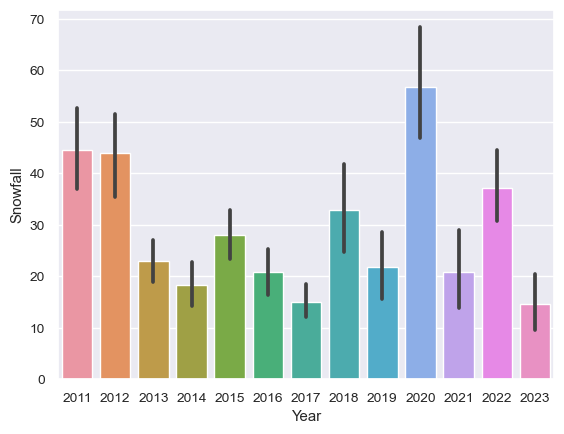

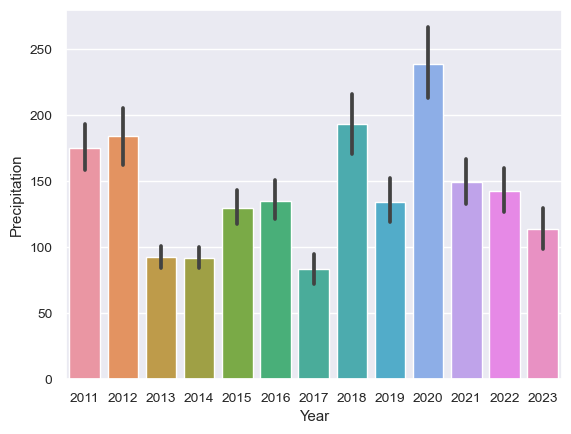

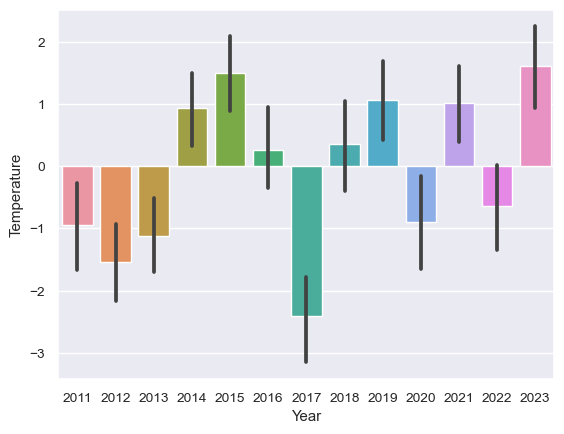

In [60]:

sns.set(font_scale=.9)
snowfall_plot = sns.barplot(y=df['Snow'],
                                      x = df['year']
                                     ).set(ylabel='Snowfall', xlabel='Year')
plt.show(snowfall_plot)
precip_plot = sns.barplot(y=df['Precip'],
                                      x = df['year']
                                 ).set(ylabel='Precipitation', xlabel='Year')
plt.show(precip_plot)
sns.set_style("whitegrid",{'axes.grid' : False})
sns.set(font_scale=.9)
temp_plot = sns.barplot(y=df['Temp'],
                                      x = df['year']
                                     ).set(ylabel='Temperature', xlabel='Year')
plt.show(temp_plot)



/Users/allysawebber/Documents/School/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/allysawebber/Documents/School/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/allysawebber/Documents/School/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/allysawebber/Documents/School/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height sma

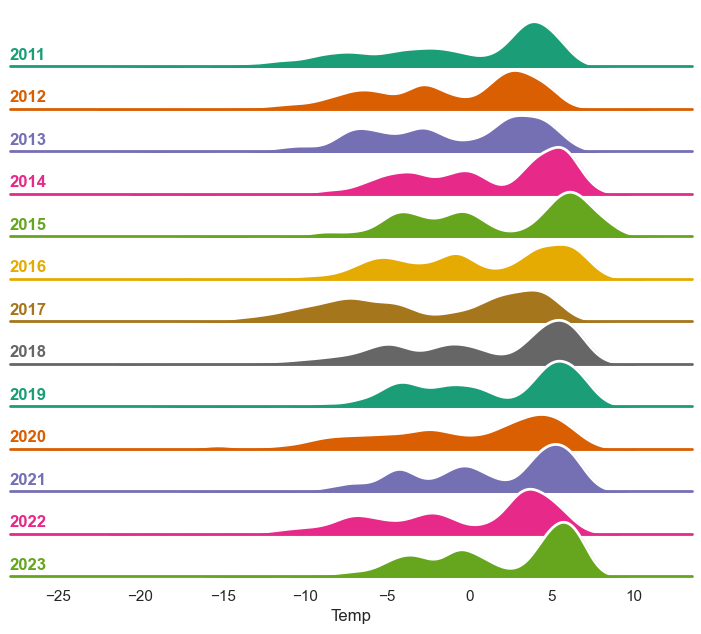

In [97]:
# try with ridgeline
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="year", hue="year", aspect=15, height=.5, palette='Dark2')

# Draw the densities in a few steps
g.map(sns.kdeplot, "Temp",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "Temp", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "Temp")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

#### The analysed values, temperature, precipitation, and snowfall, do not appear to have undergone a significant changes in the years shown. They do appear to fluctuate from year to year, likely due to el Nino, and la Nina patterns, and random chance. 2017 jumps out as an uncommonly cold and dry year in the output.  Overall, it is likely that a longer time frame is required to visualize significant changes in the analysed values. 

## How do snowfall, precipitation and temperature values interact throughout the year? Are values in the winter predictive of values in the summer?

In [61]:
#groupby to take mean values by each year
meantemp = df.groupby('year')['Temp'].mean()
meantemp = pd.DataFrame(meantemp)

meansnow = df.groupby('year')['Snow'].mean()
meansnow = pd.DataFrame(meansnow)

meanprecip = df.groupby('year')['Precip'].mean()
meanprecip = pd.DataFrame(meanprecip)

meanprecip2 = climatedf.groupby('year')['Precip2'].mean()
meanprecip2 = pd.DataFrame(meanprecip2)

meantemp2 = climatedf.groupby('year')['Temp2'].mean()
meantemp2 = pd.DataFrame(meantemp2)

meansdf = pd.merge(meansnow, meantemp, how="outer", on=['year'])
meansdf['Year'] = meansdf.index

newdf = pd.merge(meansdf, meanprecip, how="outer", on=['year'])
df5 = pd.merge(newdf, meanprecip2, how='outer', on=['year'])
final = pd.merge(df5, meantemp2, how='outer', on=['year'])

final
#df5 = newdf.merge(meantemp2,on='year').merge(meanprecip2,on='year')

,Snow,Temp,Year,Precip,Precip2,Temp2
year,,,,,,
2011,44.624309,-0.945935,2011,175.250612,37.555596,16.331502
2012,43.885641,-1.539552,2012,183.993561,22.002174,17.430189
2013,22.887245,-1.113688,2013,92.328519,59.965328,17.672075
2014,18.304762,0.936466,2014,91.538235,29.881784,18.172201
2015,27.992391,1.491635,2015,129.236496,66.177395,17.367063
2016,20.772515,0.265504,2016,134.873864,42.756452,17.846091
2017,15.040127,-2.406148,2017,83.755645,28.475720,18.280000
2018,32.858394,0.355752,2018,192.882589,16.674648,17.611737
2019,21.826772,1.062281,2019,134.270183,45.433654,17.350655


#### Visualization of summer precipitation versus winter precipitation

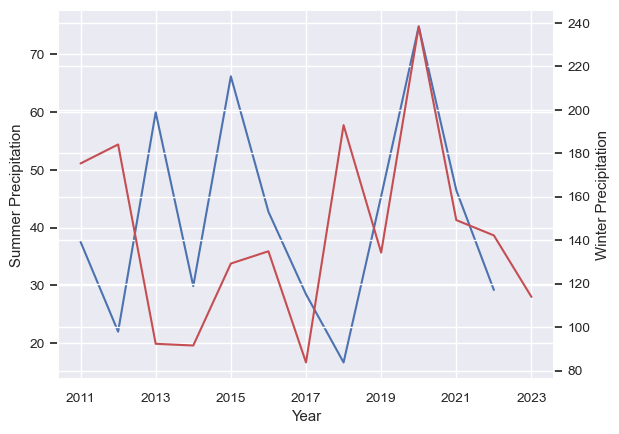

In [116]:
ax = final.plot(x="Year", y="Precip2", legend=False)
ax2 = ax.twinx()
final.plot(x="Year", y="Precip", ax=ax2, legend=False, color="r")
ax.set(xlabel='Year', ylabel='Summer Precipitation')
ax2.set(ylabel='Winter Precipitation')
plt.show()

#### Visualization of winter temperature versus summer temperature

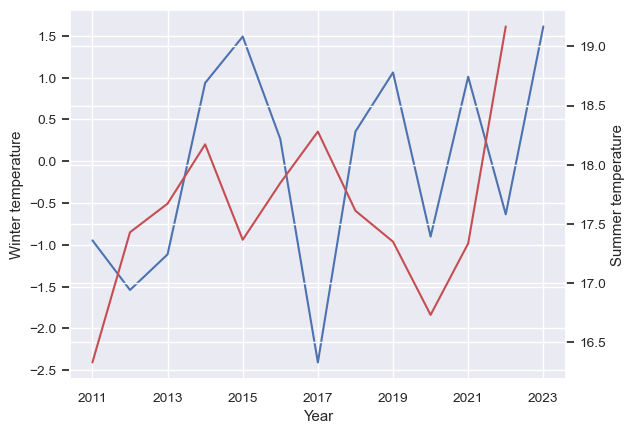

In [112]:
ax = final.plot(x="Year", y="Temp", legend=False)
ax2 = ax.twinx()
final.plot(x="Year", y="Temp2", ax=ax2, legend=False, color="r")
ax.set(xlabel='Year', ylabel='Winter temperature')
ax2.set(ylabel='Summer temperature')
plt.show()

#### Winter and summer values of temperature appear to coinside somewhat, with a lot of peaks and lows matching within the years. There is an odd instance in 2017 where these values are opposite one another. The same pattern appears in winter and summer precipiation, with values matching up relatively well except for in 2017. It would be interesting to look more closely at what was occuring in 2017. 

## How do snowfall, precipitation and temperature values interact with one another? 

#### Visualization of snow verus temperature values in January

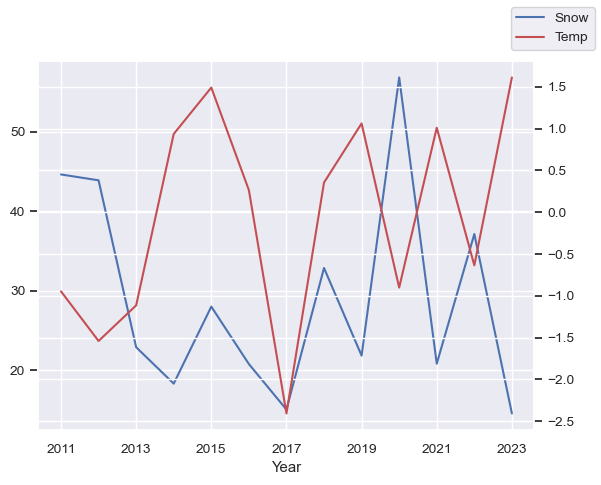

In [113]:
ax = newdf.plot(x="Year", y="Snow", legend=False)
ax2 = ax.twinx()
newdf.plot(x="Year", y="Temp", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show()

#### Visualization of precipitation verus temperature values in January

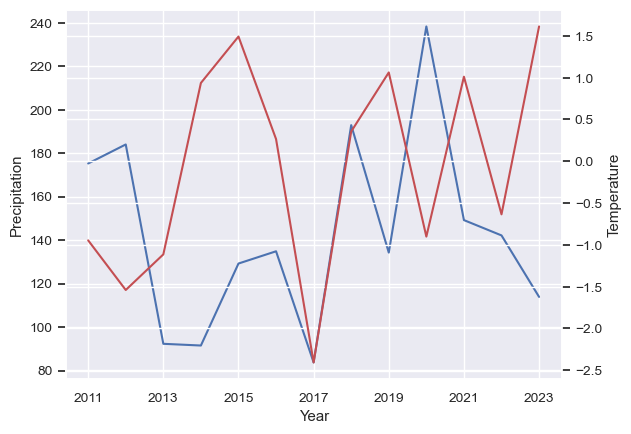

In [114]:
ax = newdf.plot(x="Year", y="Precip", legend=False)
ax2 = ax.twinx()
newdf.plot(x="Year", y="Temp", ax=ax2, legend=False, color="r")
ax.set(xlabel='Year', ylabel='Precipitation')
ax2.set(ylabel='Temperature')
plt.show()


#### Visualization of snow verus precipitation values in January

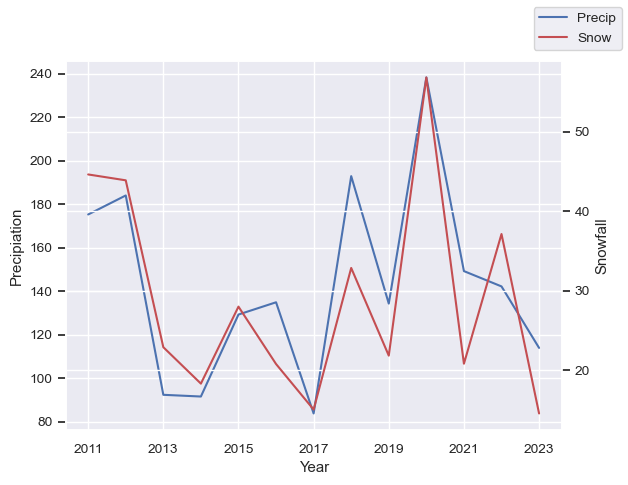

In [115]:
ax = newdf.plot(x="Year", y="Precip", legend=False)
ax2 = ax.twinx()
newdf.plot(x="Year", y="Snow", ax=ax2, legend=False, color="r")
ax.figure.legend()
ax.set(xlabel='Year', ylabel='Precipiation')
ax2.set(ylabel='Snowfall')
plt.show()

#### Temperature values within January appears to have an inverse relationship with precipitation and snowfall in Janurary, while precipiation and snowfall values in January mirror eachother in their values.